# カーネルSVM

SVMが高い人気をほかっている理由の１つに、非線形問題へ対応するために、「カーネル化」することが比較的簡単にできるのためでもあります。

## 非線形分類問題とは

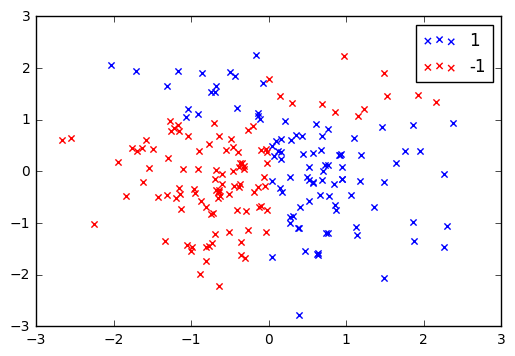

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ランダムなノイズを含んだXORデータセットを作成
np.random.seed(0) # 乱数のシードを指定
X_xor = np.random.randn(200, 2) # 標準正規分布に従う乱数で200行2列の行列を作成
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 1) # 排他的論理和を実行
y_xor = np.where(y_xor, 1, -1) # 真の場合1, 儀の場合-1を割り当てる


# XORデータセットをプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='x', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

## RBFカーネルによるSVM

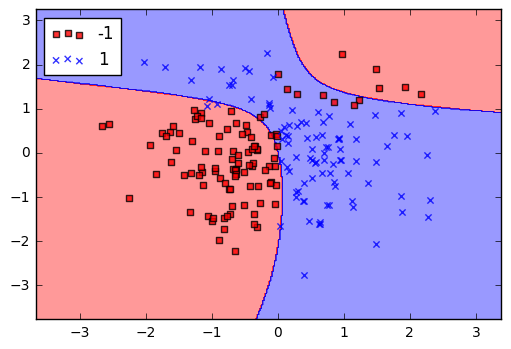

In [4]:
from sklearn.svm import SVC
import lib

# RBFカーネルによるSVMをトレーニング
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

# 決定境界をプロット
lib.plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

## Irisデータに適用

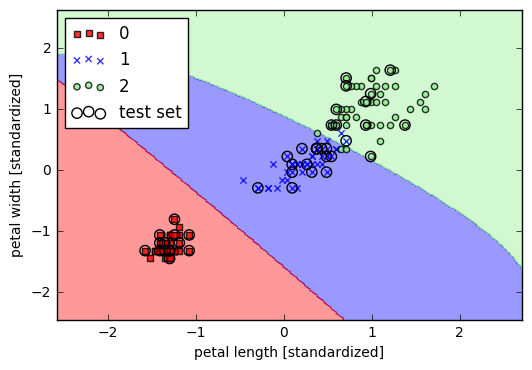

In [9]:
# Irisデータの読み込み
X_train_std, X_test_std, y_train, y_test = lib.load_iris_data()

# SVMのトレーニング
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

# トレーニングデータとテストデータを行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 決定境界のプロット
lib.plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## γパラメータを変更

In [ ]:
# SVMのトレーニング
svm = SVC(kernel='rbf', random_state=0, gamma=, C=1.0)
svm.fit(X_train_std, y_train)

# トレーニングデータとテストデータを行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 決定境界のプロット
lib.plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()